# No common support visualization


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


74
Group        | MSE (Fitted Line)    | MSE (Constant Model)
---------------------------------------------------------
Control      | 0.00632              | 0.00883             
Treatment    | 0.00564              | 0.00610             



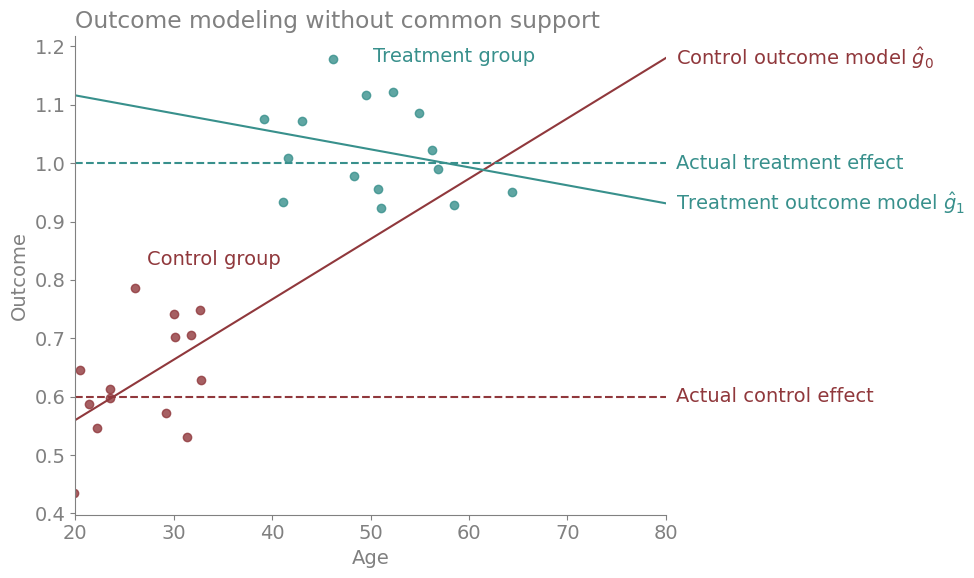

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Seed for reproducibility
seed = 74 #int(np.random.uniform(1000))
print(seed)
np.random.seed(seed)

# Generating data
x_control = np.random.uniform(18, 35, 15)  # Ages for control group
y_control = np.ones_like(x_control)*.6 + np.random.normal(0, 0.1, x_control.size)  # Outcomes for control

x_treatment = np.random.uniform(35, 65, 15)  # Ages for treatment group
y_treatment = np.ones_like(x_treatment) + np.random.normal(0, 0.1, x_treatment.size)  # Outcomes for treatment

# Combine data
x = np.concatenate([x_control, x_treatment])
y = np.concatenate([y_control, y_treatment])

# Fit OLS regression
model_control = LinearRegression()
model_control.fit(x_control.reshape(-1, 1), y_control)

model_treatment = LinearRegression()
model_treatment.fit(x_treatment.reshape(-1, 1), y_treatment)

# Predictions for plot
x_vals = np.linspace(18, 80, 200)
y_preds_control = model_control.predict(x_vals.reshape(-1, 1))
y_preds_treatment = model_treatment.predict(x_vals.reshape(-1, 1))

# Extract coefficients for intersection calculation
coef_control = model_control.coef_[0]
intercept_control = model_control.intercept_

coef_treatment = model_treatment.coef_[0]
intercept_treatment = model_treatment.intercept_

# Calculate the x value of intersection (solving for x where two lines are equal)
x_intersection = (intercept_control - intercept_treatment) / (coef_treatment - coef_control)

# Calculate the y value of intersection
y_intersection = model_control.predict([[x_intersection]])[0]


# Calculate MSE for fitted lines
mse_control = mean_squared_error(y_control, model_control.predict(x_control.reshape(-1, 1)))
mse_treatment = mean_squared_error(y_treatment, model_treatment.predict(x_treatment.reshape(-1, 1)))

# Fit constant models
mean_control = np.mean(y_control)
mean_treatment = np.mean(y_treatment)



y_control_const = np.full_like(y_control, mean_control)
y_treatment_const = np.full_like(y_treatment, mean_treatment)

# Calculate MSE for constant models
mse_control_const = mean_squared_error(y_control, y_control_const)
mse_treatment_const = mean_squared_error(y_treatment, y_treatment_const)

headers = ["Group", "MSE (Fitted Line)", "MSE (Constant Model)"]
data = [
    ["Control", f"{mse_control:.5f}", f"{mse_control_const:.5f}"],
    ["Treatment", f"{mse_treatment:.5f}", f"{mse_treatment_const:.5f}"]
]

# Build a formatted table
table = f"{headers[0]:<12} | {headers[1]:<20} | {headers[2]:<20}\n"
table += "-" * 57 + "\n"
for row in data:
    table += f"{row[0]:<12} | {row[1]:<20} | {row[2]:<20}\n"

print(table)



# Plotting
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})  
ax = plt.gca()
def beautify_ax(ax: plt.Axes, color: str) -> None:
    """
    Beautify a matplotlib axes object by modifying spines, labels, legend, and tick parameters.

    :param ax: The matplotlib axes object to beautify.
    :param color: The color to use for the axes spines, labels, legend, and ticks.
    """
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color(color)
    ax.spines["left"].set_color(color)
    # Set x and y axis labels
    plt.xlabel("Epoch", color=color)
    plt.ylabel("Metric Value", color=color)
    # Set legend font color and remove border
    legend = ax.legend(frameon=False)
    for text in legend.get_texts():
        text.set_color(color)
    # Set tick color
    ax.tick_params(axis="x", colors=color)
    ax.tick_params(axis="y", colors=color)

# Apply beautification
beautify_ax(ax, "gray")
plt.xlim(20, 80)
control_color = '#90383c'
treatment_color = '#38908c'
# Scatter plots
plt.scatter(x_control, y_control, color=control_color, alpha=0.8)
plt.scatter(x_treatment, y_treatment, color=treatment_color, alpha=0.8)

# Calculate the center of gravity for scatter plots
center_control = [np.mean(x_control), np.mean(y_control)]
center_treatment = [np.mean(x_treatment), np.mean(y_treatment)]

# Add text labels for scatter plots
plt.text(center_control[0]+1, center_control[1] + 0.2, 'Control group', color=control_color)
plt.text(center_treatment[0], center_treatment[1] + 0.15, 'Treatment group', color=treatment_color)
# 
# Line plots
plt.plot(x_vals, y_preds_control, color=control_color)
plt.plot(x_vals, y_preds_treatment, color=treatment_color)

# Add text labels at the end of the fitted lines
plt.text(x_vals[-1]+1, y_preds_control[-1], r'Control outcome model $\hat{g}_0$', color=control_color, va='center')
plt.text(x_vals[-1]+1, y_preds_treatment[-1], r'Treatment outcome model $\hat{g}_1$', color=treatment_color, va='center')

# Horizontal dashed lines
plt.axhline(y=1, color=treatment_color, linestyle='--')
plt.axhline(y=0.6, color=control_color, linestyle='--')

# Add text labels for horizontal lines
plt.text(80+1, 1, 'Actual treatment effect', color=treatment_color, va='center')
plt.text(80+1, 0.6, 'Actual control effect', color=control_color, va='center')

plt.xlabel('Age')
plt.ylabel('Outcome')
plt.title('Outcome modeling without common support', loc='left', color='gray')
plt.tight_layout() 
plt.savefig('violated_overlap_graph.pdf')
plt.show()